In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.patches import Patch

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import warnings,scipy
warnings.filterwarnings("ignore")

In [3]:
# can turn on when running on a powerful machine
#pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
df_loan = pd.read_csv('loan.csv')

In [5]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data cleansing

### Validate missing data

In [7]:
df_loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#ID field should be string/character type
df_loan.id.astype(str)

0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
          ...   
39712      92187
39713      90665
39714      90395
39715      90376
39716      87023
Name: id, Length: 39717, dtype: object

#### Extract Loan dataframe to a sub-dataframe that contains columns in which there's at least 1 null value each

In [9]:
nulls_df = df_loan.loc[:, df_loan.isna().any()]

In [10]:
nulls_df.isna().sum()

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [11]:
nulls_df.columns

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

#### Checking number of columns with missing values to be processed

In [12]:
len(nulls_df.columns)

68

In [13]:
nulls_df.dtypes.value_counts()

float64    60
object      8
dtype: int64

#### It's clear to see that there are 2 data types, float64 and object. View the columns with data type Object

In [14]:
nulls_df.select_dtypes(include=["object"])

,emp_title,emp_length,desc,title,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.70%,Jan-15,NaN,May-16
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.40%,Apr-13,NaN,Sep-13
2,NaN,10+ years,NaN,real estate business,98.50%,Jun-14,NaN,May-16
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,21%,Jan-15,NaN,Apr-16
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,53.90%,May-16,Jun-16,May-16
...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Our current gutter system on our home is old a...,Home Improvement,13.10%,Jul-10,NaN,Jun-10
39713,"Squarewave Solutions, Ltd.",3 years,The rate of interest and fees incurred by carr...,Retiring credit card debt,26.90%,Jul-10,NaN,Jul-10
39714,NaN,< 1 year,NaN,MBA Loan Consolidation,19.40%,Apr-08,NaN,Jun-07
39715,NaN,< 1 year,NaN,JAL Loan,0.70%,Jan-08,NaN,Jun-07


#### Checking to see we can convert these fields into Numeric fields: emp_length, revol_util

In [15]:
nulls_df[['emp_length', 'revol_util']].value_counts()

emp_length  revol_util
10+ years   0%            198
2 years     0%            126
< 1 year    0%            124
3 years     0%            119
4 years     0%             79
                         ... 
2 years     86.40%          1
8 years     99.80%          1
            99.90%          1
6 years     78.20%          1
8 years     18%             1
Length: 10039, dtype: int64

In [16]:
#for column emp_lenght, strip years(s) to convert this field into numeric
df_loan['emp_length'].replace('< 1 year', '0 years', inplace=True)
df_loan['emp_length']=df_loan['emp_length'].str.rstrip('+ years').astype(np.float)
df_loan['emp_length'].fillna(0,inplace=True)

In [17]:
df_loan.emp_length.dtypes

dtype('float64')

In [18]:
#for column revol_util, just strip percentage % symbol to make this column into numeric data type
df_loan['revol_util']=df_loan['revol_util'].str.rstrip('%').astype(np.float)

In [19]:
df_loan.revol_util.dtypes

dtype('float64')

#### Convert 3 columns last_pymnt_d, next_pymnt_d, last_credit_pull_d into Date type. <br> Nan values should be replaced by values of 1900-01-01

In [20]:
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'], format='%b-%y')

In [21]:
df_loan['last_pymnt_d']

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-07-01
39713   2010-07-01
39714   2008-04-01
39715   2008-01-01
39716   2010-06-01
Name: last_pymnt_d, Length: 39717, dtype: datetime64[ns]

In [22]:
df_loan['last_pymnt_d'].fillna('1900-01-01',inplace=True)

In [23]:
df_loan.last_pymnt_d.isna().sum()

0

#### Apply the same logic for next_pymnt_d and last_credit_pull_d

In [24]:
df_loan['next_pymnt_d'] = pd.to_datetime(df_loan['next_pymnt_d'], format='%b-%y')
df_loan['next_pymnt_d'].fillna('1900-01-01',inplace=True)

In [25]:
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'], format='%b-%y')
df_loan['last_credit_pull_d'].fillna('1900-01-01',inplace=True)

In [26]:
df_loan.dtypes.nunique()

4

In [27]:
df_loan.collections_12_mths_ex_med.isna().sum()

56

In [28]:
df_loan.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

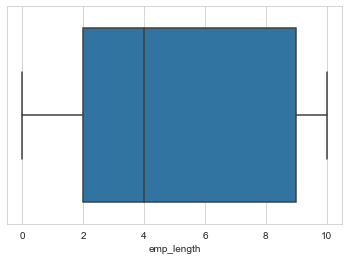

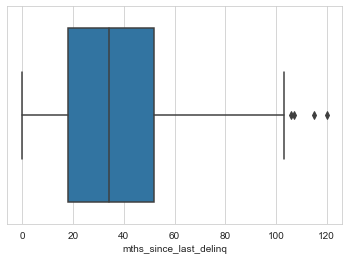

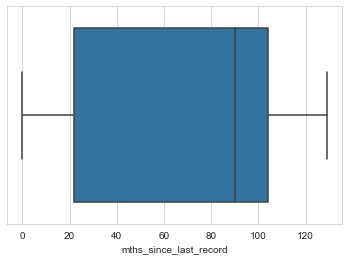

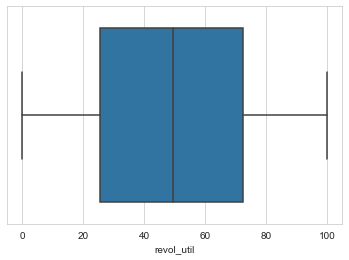

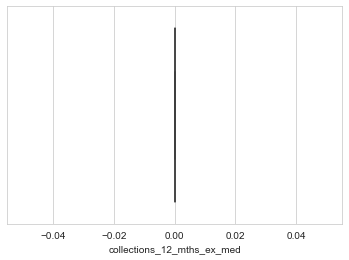

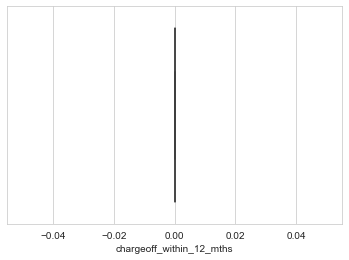

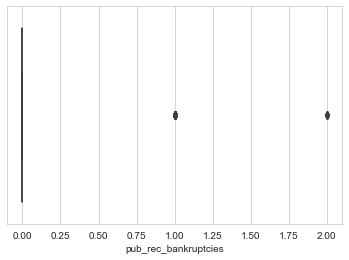

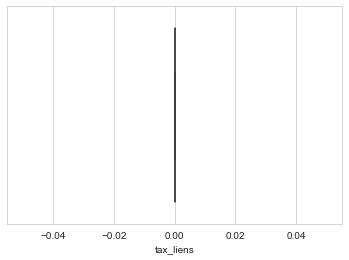

In [29]:
#loop thru null df to visualize outliers of continuous variables
# remove some columns which contains only Null values
for column in nulls_df.columns:
    if df_loan[column].isna().sum() == len(df_loan.index):
        df_loan.drop(column, axis=1, inplace=True)
        continue
    if df_loan[column].dtype == 'float64':
        sns.boxplot(df_loan[pd.notna(df_loan[column])][column])
        plt.show()        

#### Based on the visualization, it's clear to remove some columns which contain either Null values or zero values

In [30]:
removed_cols = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']

In [31]:
df_loan.drop(columns=removed_cols, axis=1, inplace=True)

In [32]:
nulls_df.drop(columns=removed_cols, axis=1, inplace=True)

#### Final check cleansing step for continuous variables

In [33]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
emp_length,39717.0,4.838835,3.605528,0.00,2.00,4.000000,9.000000e+00,1.000000e+01
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01


#### 2 fields acc_now_delinq & delinq_amnt should be removed because they contain only zero values

In [34]:
df_loan.drop(columns=['acc_now_delinq', 'delinq_amnt'], axis=1, inplace=True)

In [35]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               39717 non-null  float64       
 12  home_ownership           39717 n

#### Replace missing values in numeric columns with Median

In [36]:
float_cols = nulls_df.select_dtypes(include=["float64"]).columns

In [37]:
for col in float_cols:
    if col in df_loan.columns:
        median = df_loan[col].median
        df_loan[col].fillna(median, inplace=True)

In [38]:
df_loan.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc  

In [39]:
# There are still some fields with missing values. continue impute missing values for column revol_util
df_loan.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

In [40]:
df_loan['revol_util'].fillna(df_loan.revol_util.median, inplace=True)

In [41]:
# now check and fill missing value for column emp_title
df_loan.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [42]:
#replace Null values in emp_title with "missing"
df_loan.emp_title.fillna("Missing", inplace=True)

In [43]:
df_loan.emp_title.isna().sum()

0

In [44]:
# now check and fill missing value for column title
df_loan.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [45]:
#replace Null values in emp_title with "missing"
df_loan.title.fillna("Missing", inplace=True)

In [46]:
# now check and fill missing value for column desc
df_loan.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [47]:
#replace Null values in desc with "missing"
df_loan.desc.fillna("Missing", inplace=True)

#### Remove constant features, which contain a single value and do not bring a meaningful interpretation 

In [48]:
print("Contant fields to be removed:")
for column in list(df_loan.columns):
    if df_loan[column].unique().size < 2:
        print(column)
        df_loan.drop(column, axis=1, inplace=True)

Contant fields to be removed:
pymnt_plan
initial_list_status
policy_code
application_type


In [49]:
df_loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,1900-01-01,2016-05-01
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,1900-01-01,2013-09-01
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,1900-01-01,2016-05-01
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,1900-01-01,2016-04-01
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,1900-01-01,2016-01-01
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,1900-01-01,2016-05-01
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,1900-01-01,2014-12-01
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,1900-01-01,2012-08-01
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,1900-01-01,2013-03-01


In [50]:
#convert column int_rate into numeric type
df_loan['int_rate']=df_loan['int_rate'].str.replace("%","").astype(np.float)

In [51]:
# data should now be fully cleansed
df_loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp     

### Remove outliers

#### Remove date fields

In [55]:
df_loan.drop(columns=['last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)

#### As the rule of thumb for outliers detection, any values that are not in the range (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are considered as outliers and should be removed

In [56]:
Q1 = df_loan.quantile(0.25)
Q3 = df_loan.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                         321534.00000
member_id                  380559.00000
loan_amnt                    9500.00000
funded_amnt                  9600.00000
funded_amnt_inv              9400.00000
int_rate                        5.34000
installment                   263.76000
emp_length                      7.00000
annual_inc                  41896.00000
dti                            10.43000
delinq_2yrs                     0.00000
inq_last_6mths                  1.00000
open_acc                        6.00000
pub_rec                         0.00000
revol_bal                   13355.00000
total_acc                      16.00000
out_prncp                       0.00000
out_prncp_inv                   0.00000
total_pymnt                 10957.50304
total_pymnt_inv             10686.50000
total_rec_prncp              9053.26000
total_rec_int                2171.22000
total_rec_late_fee              0.00000
recoveries                      0.00000
collection_recovery_fee         0.00000


In [57]:
df_loan = df_loan[~((df_loan < (Q1 - 1.5 * IQR)) |(df_loan > (Q3 + 1.5 * IQR))).any(axis=1)]

## EDA with Univariate and Bivariate

####  Because the company wants to understand the driving factors (or driver variables) behind loan default, extract Charged off data into a separate DF for further analysis

In [58]:
grouped_df = df_loan.groupby('loan_status')
charged_off_df = grouped_df.get_group('Charged Off')

#### Extract verified/verified source data only

In [59]:
veri_grp_df = charged_off_df.groupby('verification_status')
source_verified = veri_grp_df.get_group('Source Verified')
verified = veri_grp_df.get_group('Verified')

In [60]:
default_df = pd.concat([source_verified,verified])

In [61]:
default_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
204,1066835,1301027,10500,10500,10500.000000,36 months,16.29,370.66,D,D1,...,8,0.0,0.0,2222.16,2222.16,1414.89,807.27,0.0,0.0,0.0
220,1066798,1300982,9500,9500,9500.000000,36 months,12.69,318.68,B,B5,...,42,0.0,0.0,7002.16,7002.16,5366.65,1635.51,0.0,0.0,0.0
239,1066344,1300716,15600,15600,15600.000000,60 months,12.69,352.48,B,B5,...,11,0.0,0.0,16894.08,16894.08,11631.87,5262.21,0.0,0.0,0.0
324,1065348,1299443,5000,5000,5000.000000,36 months,12.42,167.08,B,B4,...,40,0.0,0.0,833.70,833.70,587.51,246.19,0.0,0.0,0.0
344,1059620,1291228,12000,12000,12000.000000,36 months,11.71,396.92,B,B3,...,17,0.0,0.0,3564.90,3564.90,2613.54,951.36,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38229,362114,367868,7000,7000,5189.112572,36 months,15.57,244.62,E,E3,...,19,0.0,0.0,2931.24,2187.12,1980.27,950.97,0.0,0.0,0.0
38297,360022,367573,10000,10000,3198.822229,36 months,11.46,329.57,B,B5,...,26,0.0,0.0,3293.48,1051.01,2439.84,853.64,0.0,0.0,0.0
38366,358312,364688,10500,10500,3975.010324,36 months,9.38,335.76,A,A5,...,14,0.0,0.0,1675.30,632.30,1285.72,389.58,0.0,0.0,0.0
38422,355485,360201,6000,5100,0.002373,36 months,11.28,167.65,C,C1,...,30,0.0,0.0,3855.72,0.00,3057.49,798.23,0.0,0.0,0.0


#### Remove columns that are not neccessary for the analysis (features that do not have impacts to the outcome)

In [62]:
default_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,360.0,712154.861111,204333.631526,349714.00,561276.7500,696147.000,8.650090e+05,1068018.00
member_id,360.0,886297.488889,256195.748131,351467.00,722349.2500,887289.000,1.078280e+06,1302371.00
loan_amnt,360.0,12172.708333,6740.781384,1000.00,6000.0000,12000.000,1.710000e+04,27500.00
funded_amnt,360.0,11774.513889,6393.214988,1000.00,6000.0000,11412.500,1.600000e+04,27500.00
funded_amnt_inv,360.0,10906.265177,6413.133747,0.00,5350.0000,10000.000,1.526875e+04,26225.00
int_rate,360.0,13.113722,3.632406,5.42,10.7500,12.690,1.559000e+01,22.35
installment,360.0,326.148417,171.615662,31.01,186.1225,322.045,4.377525e+02,822.78
emp_length,360.0,5.236111,3.817906,0.00,2.0000,5.000,1.000000e+01,10.00
annual_inc,360.0,52502.279111,21657.155201,9600.00,36972.0000,50000.000,6.485000e+04,132996.00
dti,360.0,14.718222,6.453501,0.34,10.8025,15.035,1.984750e+01,28.63


#### Columns of out_prncp and out_prncp_inv to be removed together with other columns that are not neccessary for the analysis (features that do not have impacts to the outcome)

In [63]:
dropped_cols = ['out_prncp','out_prncp_inv', 'id', 'member_id', 'loan_status', 'verification_status', 'zip_code', 'addr_state','total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee']

In [64]:
default_df.drop(columns=dropped_cols, axis=1, inplace=True)

In [65]:
default_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'url', 'desc', 'purpose',
       'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp'],
      dtype='object')

#### Finding the driving factors behind loan default

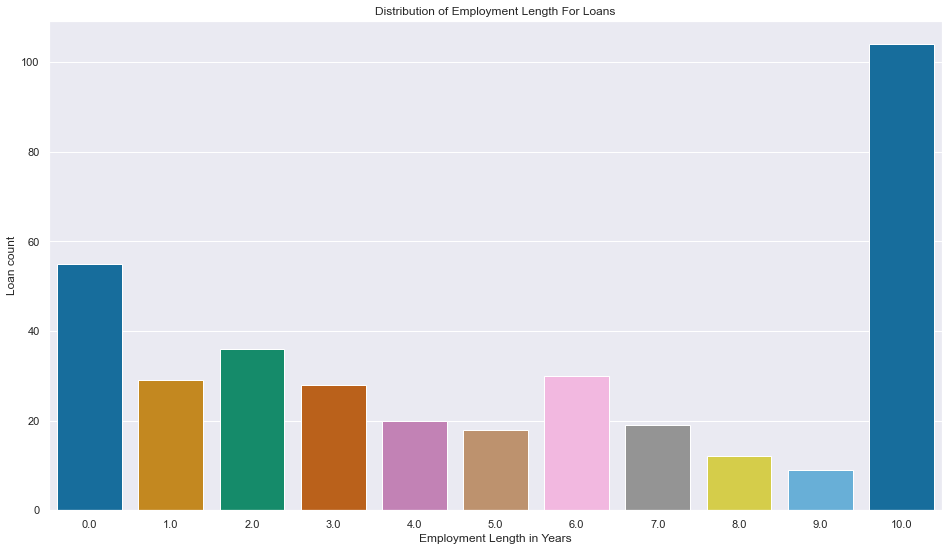

In [66]:
sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(data=default_df, x='emp_length', palette='colorblind')
plt.xlabel("Employment Length in Years")
plt.ylabel("Loan count")
plt.title("Distribution of Employment Length For Loans")
plt.show()

#### Observation: Bad loans happen the most for borrowsers with 10+ years employment<br>

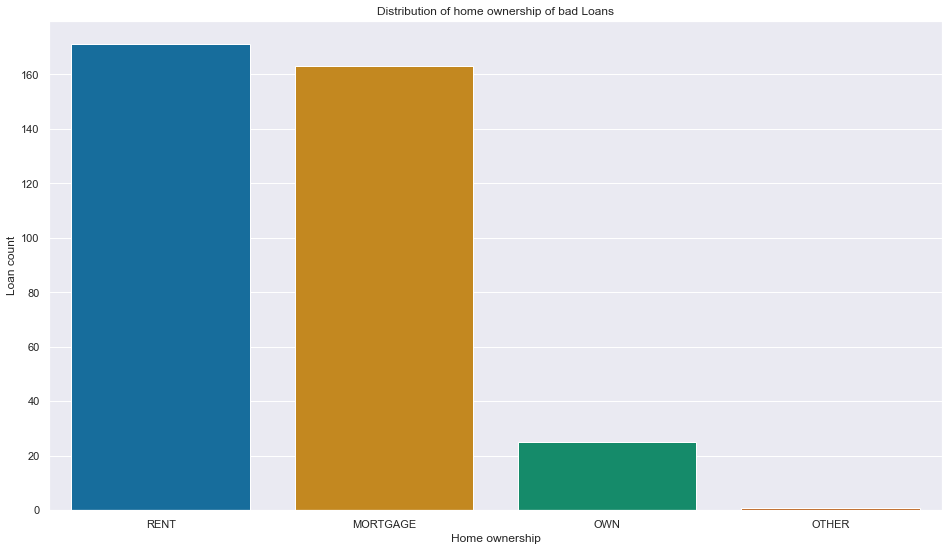

In [70]:
sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(data=default_df, x='home_ownership', palette='colorblind')
plt.xlabel("Home ownership")
plt.ylabel("Loan count")
plt.title("Distribution of home ownership of bad Loans")
plt.show()

#### It is showing that it's more likely to have a bad Loan if a borrowser is a renter or having a mortgage instead of being the owner a home<br>

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

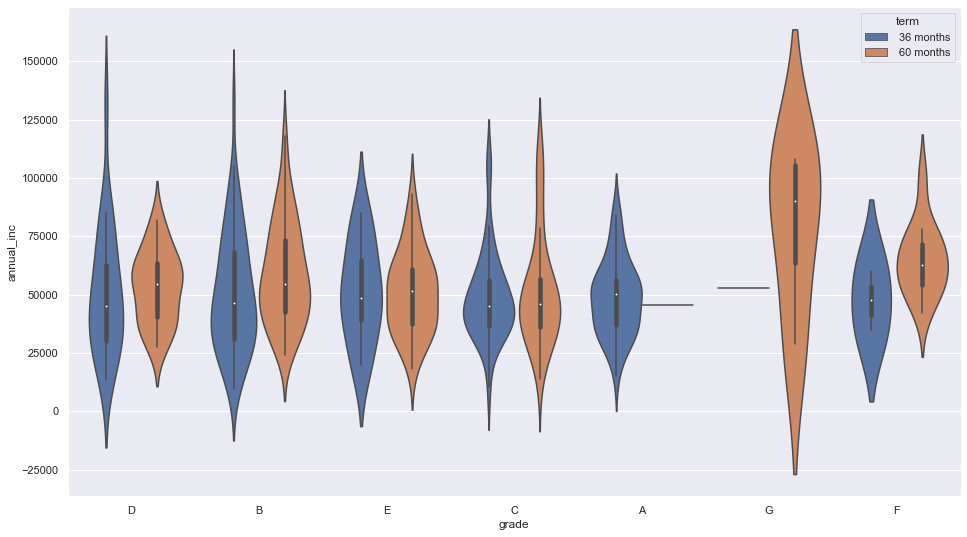

In [85]:
sns.violinplot(data=default_df, x="grade", y="annual_inc", hue="term")

#### Observation: The median of annual income is almost the same among different loan grades at about 50k, except that the median of grade G is greater than the rest, at about 85k, and the term of loan is 60 months <br>

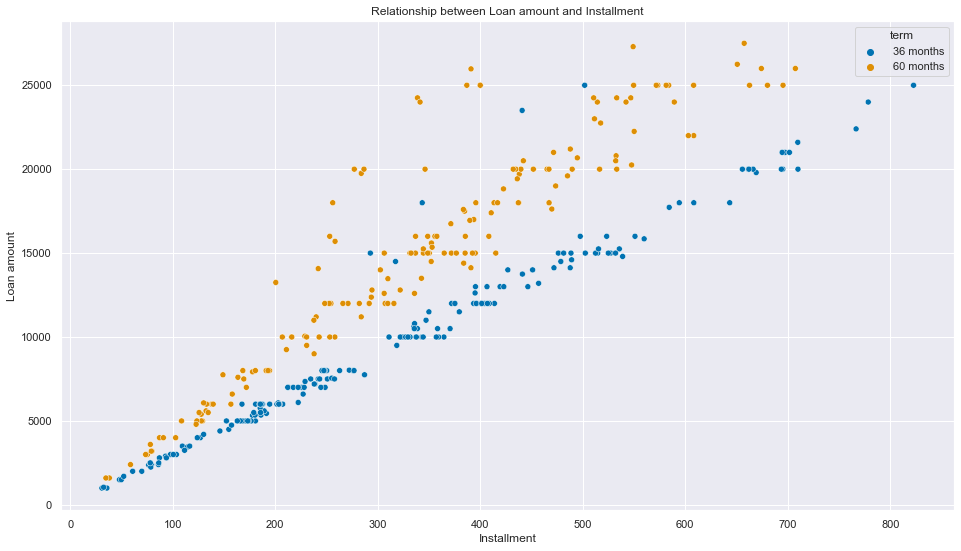

In [95]:
# sns.boxplot(data=default_df, x='loan_amnt', hue='term')

sns.set(rc={'figure.figsize':(16,9)})
sns.scatterplot(data=default_df, x='installment',y='loan_amnt', hue='term' ,palette='colorblind')
plt.xlabel("Installment")
plt.ylabel("Loan amount")
plt.title("Relationship between Loan amount and Installment")
plt.show()

#### It's obvious that there's a strong relationship between Loan amount and monthly payment (installment) for bad Loans<br>

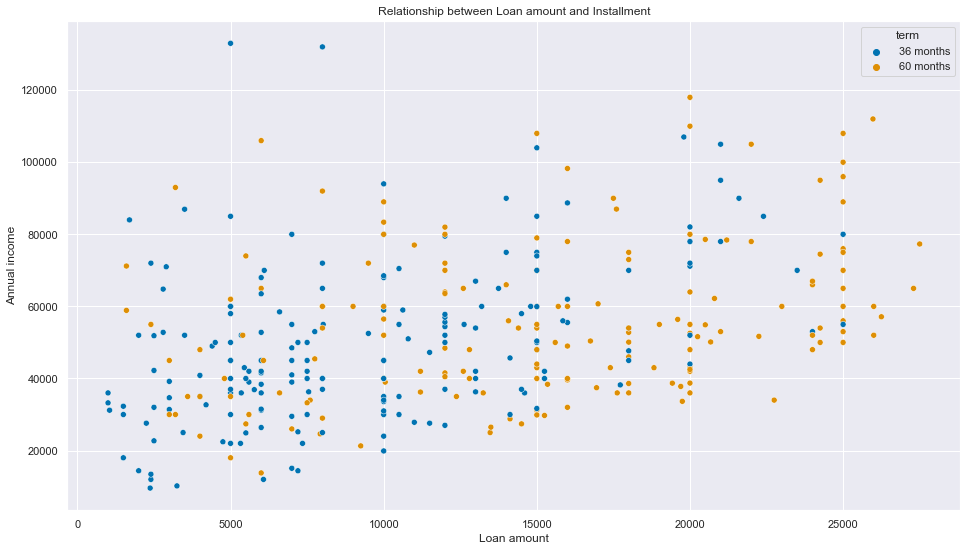

In [97]:
# sns.boxplot(data=default_df, x='loan_amnt', hue='term')

sns.set(rc={'figure.figsize':(16,9)})
sns.scatterplot(data=default_df, x='loan_amnt',y='annual_inc', hue='term' ,palette='colorblind')
plt.xlabel("Loan amount")
plt.ylabel("Annual income")
plt.title("Relationship between Loan amount and Installment")
plt.show()

#### The relationship between Annual income and Loan amount is weak. However, the density of the Loan amount is higher, if the term is shorter (36 months) and the loan amount is smaller (less than 15k) <br>

<AxesSubplot:>

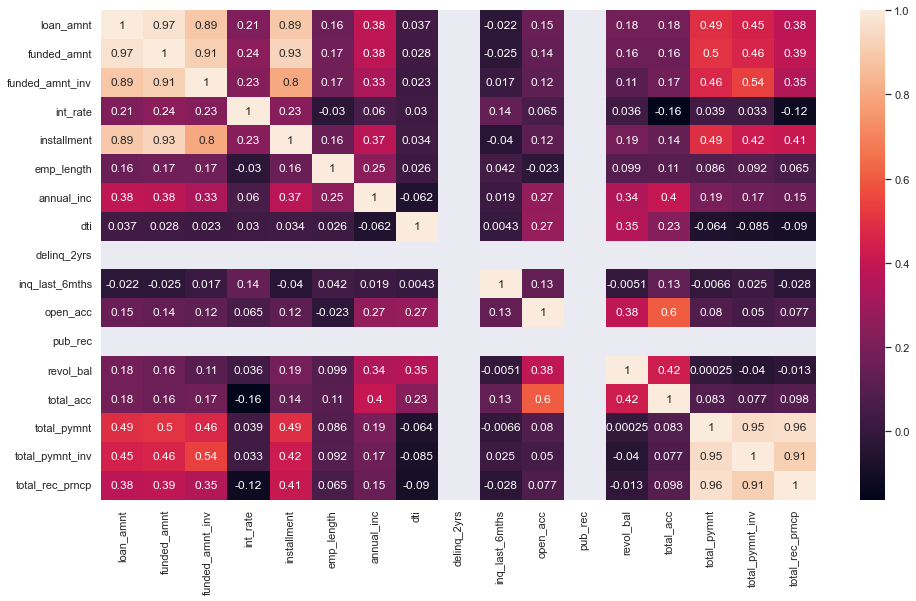

In [98]:
corr = default_df.corr()
sns.heatmap(corr, annot=True)

In [99]:
dropped_cols = ['delinq_2yrs', 'pub_rec']
default_df.drop(columns=dropped_cols, axis=1, inplace=True)

<AxesSubplot:>

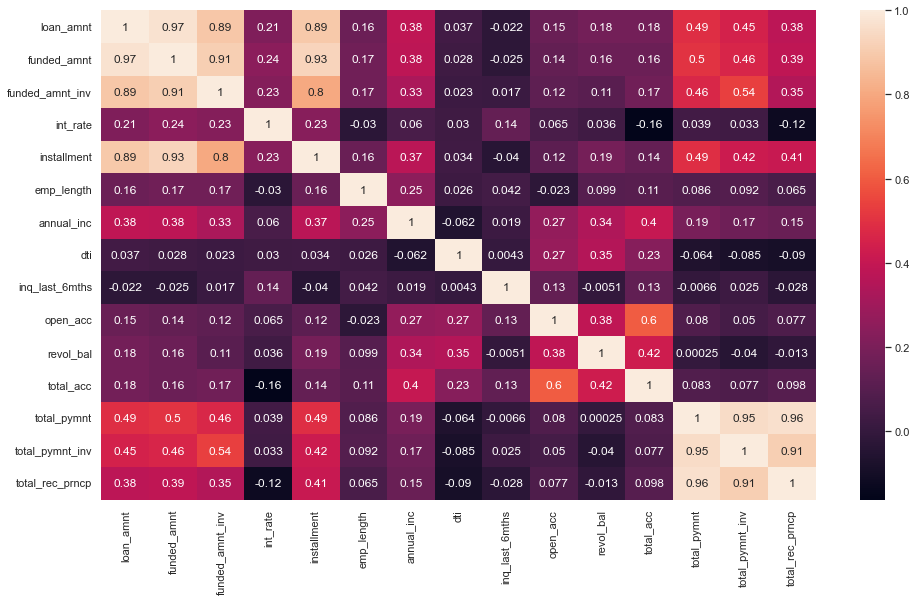

In [100]:
corr = default_df.corr()
sns.heatmap(corr, annot=True)